Load and Explore the Dataset

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("daily-min-temperatures.csv",header=0,parse_dates=["Date"],index_col='Date')

print(df.head())

print(f"Rows of data: {df.size}")

print(f"First Date: {df.index[0]}")
print(f"First Last: {df.index[df.size-1]}")

print(f"Missing data: {df.isnull().sum()}")

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
Rows of data: 3650
First Date: 1981-01-01 00:00:00
First Last: 1990-12-31 00:00:00
Missing data: Temp    0
dtype: int64


Visualize the Time Series Data

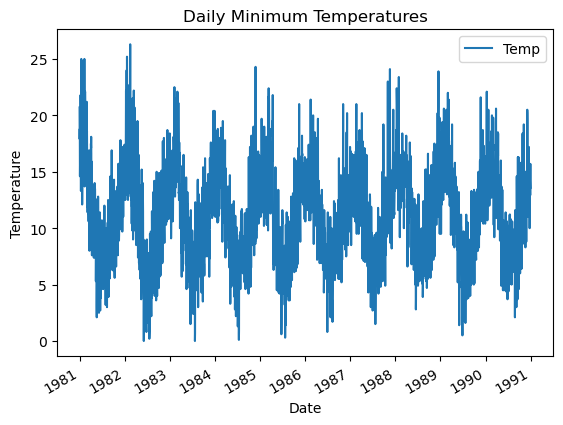

In [41]:
df.plot()
plt.title('Daily Minimum Temperatures')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

Apply the Sliding Window Method

In [42]:
def sliding_window(data, window_size=1):
    X,y= [],[]
    for i in range(len(data)-window_size):
        X.append(data[i:(i+window_size)])
        y.append(data[i+window_size])
    return pd.DataFrame(X), pd.Series(y)

window_size = 1
X,y = sliding_window(df["Temp"].values,window_size)

print(X.head())
print(y.head())


# Modify window size to 2
window_size = 2  # Use two previous days to predict the next day
X, y = sliding_window(df['Temp'].values, window_size)
print(X.head())
print(y.head())

      0
0  20.7
1  17.9
2  18.8
3  14.6
4  15.8
0    17.9
1    18.8
2    14.6
3    15.8
4    15.8
dtype: float64
      0     1
0  20.7  17.9
1  17.9  18.8
2  18.8  14.6
3  14.6  15.8
4  15.8  15.8
0    18.8
1    14.6
2    15.8
3    15.8
4    15.8
dtype: float64


Train a Supervised Learning Model

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print(f"Mean Square Error: {mse}")

Mean Square Error: 5.611888585343398


Visualize Predictions

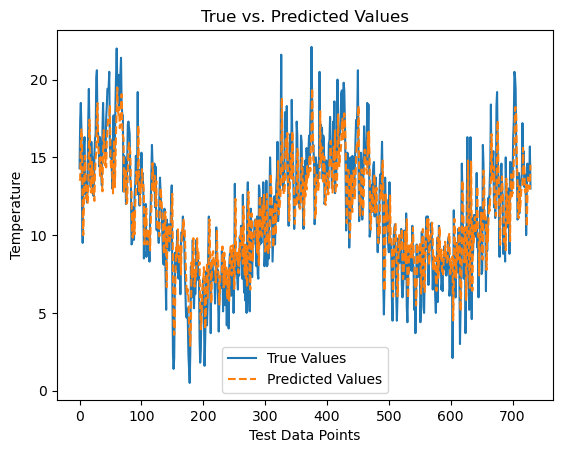

In [44]:
plt.plot(y_test.values,label="True Values")
plt.plot(y_pred,label="Predicted Values",linestyle='--')
plt.title("True vs. Predicted Values")
plt.xlabel("Test Data Points")
plt.ylabel("Temperature")
plt.legend()
plt.show()